In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# DFT

In [2]:
# Computes the 2D discrete Fourier transform
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
                
    return F/np.sqrt(n*m)

# Inverse DFT 

In [3]:
# Computes the inverse 2D discrete Fourier transform
def inverse_DFT2D(F):
    
    f = np.zeros(F.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    x = np.arange(n)
    
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                f[u, v] += np.sum(F[:,y] * np.exp( (1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
    
    return f/np.sqrt(n*m)

# Finding p2

In [4]:
# Finds second peak of a given fourier spectrum
def find_p2(F):
    # Flattens the spectrum
    flat = np.reshape(F, F.shape[0] * F.shape[1])
    
    # Returns max value in the spectrum, besides the first one (relative to index 0)
    return np.amax(np.real(np.abs(flat[1:flat.shape[0]])))

# Filtering spectrum

In [5]:
# Sets to 0 all coefficients for which the Fourier Spectrum is below T% of the second peak, that is, |F|< p2*T
def filter_spectrum(F, p2, threshold):
    cut = p2 * threshold
    
    # Gets number of coefficients that will be filtered (all that are less than p2*T)
    n = np.count_nonzero(np.real(np.abs(F)) < cut)
    
    # Sets to 0 all coefficients less than p2*T
    F = np.where(np.real(np.abs(F)) < cut, 0, F)
    
    return n

# Execution 

In [18]:
filename  = str(input()).rstrip()
threshold = float(input())

f = imageio.imread(filename)

# Step 1
F = DFT2D(f)

# Step 2
p2 = find_p2(F)

# Step 3
n = filter_spectrum(F, p2, threshold)

# Step 4
inv_f = inverse_DFT2D(F)

images/num_small.png
0.01


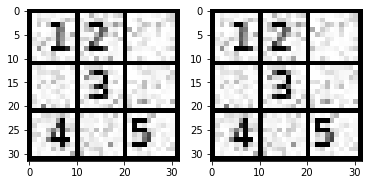

In [19]:
plt.subplot(121)
plt.imshow(f, cmap='gray')

plt.subplot(122)
plt.imshow(np.real(np.abs(inv_f)), cmap='gray')

In [21]:
print("Threshold=%.4f" % (p2 * threshold))
print("Filtered Coefficients=%d" % n)
print("Original Mean=%.2f" % np.mean(f))
print("New Mean=%.2f" % np.mean(inv_f))

Threshold=6.5500
Filtered Coefficients=12
Original Mean=168.47
New Mean=168.47


/home/daniel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.
